Gradient Descent
=======

# Theory
**Gradient Decent (GD)** is an optimization algorithm for finding a local minimum of a differentiable function. It is a first-order iterative algorithm.

## Definition
The idea of gradient decent is to take repeated steps in the opposite direction of the gradient "i.e. direction of steepest descent". Stepping in the direction of the steepest descent will eventually lead to a local minimum, hence gradient decent grantees the convergence to a local minimum. The $\text{i}^{\text{th}}$ step of the gradient decent optimizer over a function $f(x)$ is
$$
\begin{equation}
x_{i+1} = x_i - \gamma \, f^\prime(x_i)  \qquad i = 0, 1, 2, \dots
\end{equation}$$

Where $\gamma$ is step size "or learning rate" parameter $\in \mathbb{R}_+$. The following figure shows a single gradient decent step, where it shows that the step gradient descent take in the steepest descent direction is controlled by the magnitude of the gradient "i.e. the slop" $f^\prime(x_i)$ and the learning rate factor $\gamma$.

<div style="text-align:center"><img src="./Resources/Gradient Descent Step.png" width="600"/></div>

Since gradient decent is an iterative method, one need to specify a starting value $x_0$ to initiate the method. In many cases $x_0$ is chosen either from informed or uninformed guess of the local minimum. The steps gradient decent will take though the iterative process is illustrated in the following figure

<div style="text-align:center"><img src="./Resources/Gradient Descent Steps.png" width="1000"/></div>


Now the method is initiated, a natural question comes to mind is **when to stop the iteration?** For this, we use heuristic termination criteria. The criteria observe the absolute difference between the results of the current iteration and the last iteration. If the absolute difference is less than some tolerance "either absolute ($\text{ATOL}$), relative ($\text{RTOL}$) or combination of both" then the method terminate, which would indicate convergence 
$$
\begin{equation}
| x_i - x_{i+1} | \leq \text{RTOL} |x_{i+1}| + \text{ATOL}
\end{equation}$$

An important parameter that control how fast the gradient decent converge is the step size ($\gamma$), this parameter control how far the gradient decent optimizer would shoot, in each iteration; in the direction of steepest decent. A good choice of $\gamma$ would significantly improve the gradient decent performance "i.e. less steps would be required to reach the local minimum". Too small $\gamma$ would lead to slow convergence, and a too large $\gamma$ would lead to overshoot and divergence. However, what is considered a good choice of $\gamma$ is dependant on the problem at hand "i.e. the function $f(x)$ to be optimized" and the starting value $x_0$.


## Examples
Let $f(x) =x^2$, find the global minimum "since it is a convex function" of the $f(x)$ using the gradient decent optimizer. Consider the starting point $x_0 = 2.5$, step size $\gamma = 0.5$ and stopping torrance $\text{TOL}=0.001$.

First we compute the function derivative
$$
\begin{equation*}
f^\prime(x) = 2x
\end{equation*}$$

Then the gradient decent steps/iterations reads
$$
\begin{align*}
\underline{\textbf{Iteration 1:}}& \\
                     &\qquad \begin{aligned}
                                    x_{1}   &= x_0 - \gamma \, f^\prime(x_0) = 2.5 - 0.5 \cdot (2 \cdot 2.5) = 0 \\[10pt]
                                    \text{TOL Check} \qquad\Rightarrow \Delta_x  &= |x_0 - x_1| = |2.5 - 0| = 2.5 > \text{TOL} \equiv 0.001 \qquad\Rightarrow \text{(Continue)} 
                                \end{aligned}\\[15pt]
\underline{\textbf{Iteration 2:}}&\\
                     &\qquad \begin{aligned}
                                    x_{2}   &= x_1 - \gamma \, f^\prime(x_1) = 0 - 0.5 \cdot (2 \cdot 0) = 0 \\[10pt]
                                    \text{TOL Check} \qquad\Rightarrow \Delta_x  &= |x_1 - x_2| = |0 - 0| = 0 < \text{TOL} \equiv 0.001 \;\;\quad\qquad\Rightarrow \text{(Stop)} 
                                \end{aligned}\\[10pt]
\end{align*}
$$
Hence the approximated x-value of the minimum point of the function is at $x = x_2 = 0$


# Implementation
We will capture the journey of the gradient decent optimizer in a numpy vector that holds in each row the results of the respective step "including the starting value $x_0$". Hence the solution vector would read
$$
\begin{bmatrix}
    x_0     \\
            \\
    \vdots  \\
            \\
    x_N     \\      
\end{bmatrix}
$$

$
\text{where} \\
\begin{array}{l l}
    \qquad x &: \text{x value the optimizer went through}\\
    \qquad N &: \text{The last step the optimizer reached}
\end{array}
$

The length of the vector ($N+1$) is determined by the convergence of the gradient decent optimizer "according to some defined tolerance".

## Imports

In [1]:
import numpy as np
import sympy as sp
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt
import warnings

## Parameters

In [2]:
domain = [-2,3]
x_0 = 2.5           # method starting value
gamma = 0.75        # step size
func = x**2         # use sp. methods only "i.e sp.cos()"

## Algorithm
```mermaid
    flowchart LR
        x_0(Start with starting value x_0) --> x_i(Compute next value x_i)
        x_i --> condition{Delta_x < TOL?}
        condition --> |False| x_i
        condition --> |True| Exit[/Terminate/]
```

In [3]:
def GD(f_prime: Callable, x_0: float, gamma: float, TOL: float = 1e-5, maxiter: int = int(1e5)) -> tuple[float, list, int]:
    '''
    Search for the local minimum of a function using Gradient Decent algorithm.

    Args:
        f_prime: The derivative of the function to be optimized
        x_0: Starting value at the search space
        gamma: Parameter control how far down the gradient the method walks in one step, usually called "step size or learning rate"
        TOL: Tolerance at which the algorithm terminate and return a solution. Defaults to 1e-5.
        maxiter: Maximum iterations. Used as a safeguard to prevent infinite loops. Defaults to int(1e5).

    Returns:
        The approximated x value where the function local minium is, the history of the search journey and the number of steps
    '''

    x = np.zeros(maxiter)
    x[0] = x_0

    for i in range(maxiter):
        
        x[i+1] = x[i] - gamma*f_prime(x[i])
        delta_x = abs(x[i] - x[i+1])

        # convergence condition
        if delta_x < TOL:
            break


        # handel divergence & not enough iterations
        if delta_x > 1e6:
            warnings.warn(f"GD diverged where delta x = {delta_x}, choose smaller step size")
            break
        elif i+1==maxiter-1:
            warnings.warn(f"GD need more iterations steps = {i+1}, increase maxiter argument")
            break
    
    x_min, history, steps= x[i+1], x[:i+2], i+1

    return x_min, history, steps

## Results Visualization & Basic Convergence Analysis
This investigation aims to illustrate the convergence of gradient descent algorithm and show case it behavior. The following metrics/visualization used are
- Function Plot: Illustrate the journey of gradient decent optimizer
- x Value Convergence Plot: Illustrate the convergence/divergence of the gradient decent optimizer

In [4]:
# domain
xx = np.linspace(*domain)

# function
f = sp.lambdify('x', func)

# function derivative
f_prime = sp.lambdify('x', sp.diff(func))

# gradient decent
x_min, history, steps = GD(f_prime=f_prime, x_0=x_0, gamma=gamma)

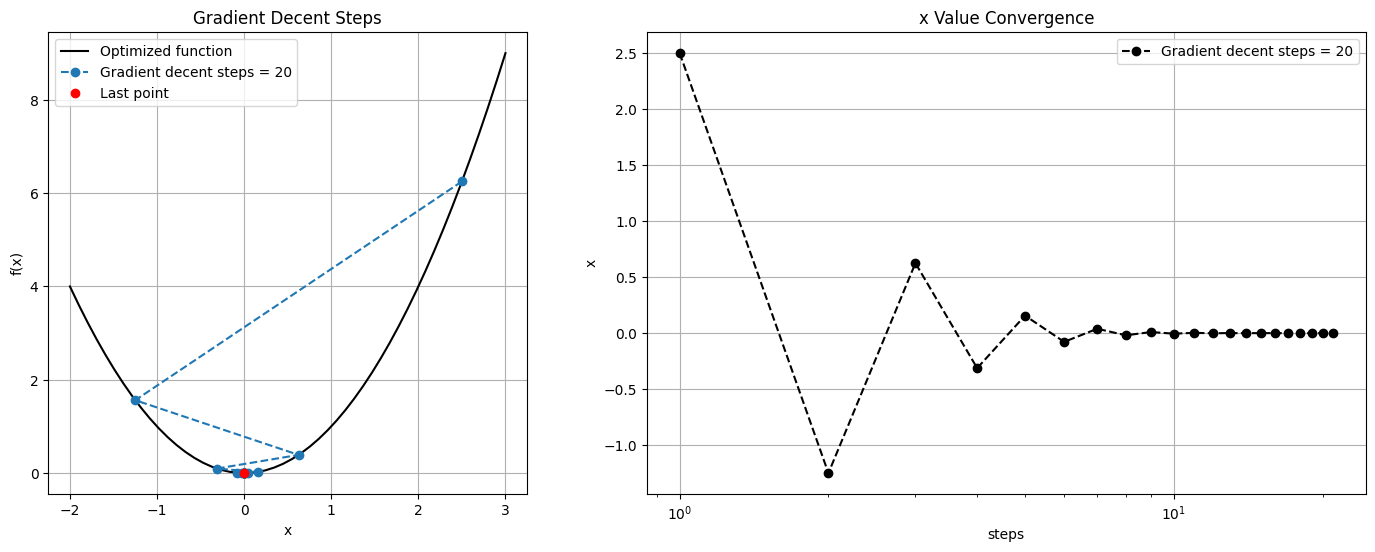

In [5]:
fig, ax = plt.subplots(1,2, figsize=(17,6), gridspec_kw={'width_ratios': [1, 1.5]})

# gradient decent steps plot
ax[0].plot(xx, f(xx), "k", label="Optimized function")
ax[0].plot(history, f(history), "--o", label=f"Gradient decent steps = {steps}")
ax[0].plot(history[-1], f(history[-1]), "ro", label="Last point")
ax[0].set(xlabel="x", ylabel="f(x)", title="Gradient Decent Steps")
ax[0].grid(True)
ax[0].legend()

# x value convergence
ax[1].plot(range(1, steps+2), history, "k--o", label=f"Gradient decent steps = {steps}")
ax[1].set(xscale='log', xlabel="steps", ylabel="x", title="x Value Convergence")
ax[1].grid(True)
ax[1].legend()

plt.show()

## Step Size ($\gamma$) Analysis
In this section we will investigate how the choice of a steps size ($\gamma$) would affect the performance of gradient decent algorithm. Proper choice of $\gamma$ would make the gradient decent optimizer take fewer steps to reach the local minimum. This bring the question, what is the proper choice of $\gamma$ "aka so called optimal $\gamma$". To answer this we will illustrate two results
- Optimal Step Size Plot: Illustrate the number steps gradient decent algorithm take for range of Step Size, and approximate the optimal from it
- Error Convergence Plot: For a set of step sizes "including the approximated optimal step size", we illustrate how fast the absolute error converge to zero
> **IMPORTANT NOTE** The notion of optimal $\gamma$ is heavily depended in the function we want to optimize and the starting point $x_0$ we start our gradient decent search from. Hence if $x_0$ is changed then optimal $\gamma$ will change.

For this investigation set up, we will specify the function we want to optimize and the staring point
- Let the following function to be defined in $[0, 4]$ 
$$
\begin{equation*}
f(x) = \frac{3e^x}{x^2 + x + 1}
\end{equation*}$$
- The starting point $x_0 = 2.5$

In [6]:
function = 3*sp.exp(x) / (x**2 + x + 1)

# function
f = sp.lambdify('x', function)

# function derivative
f_prime = sp.lambdify('x', sp.diff(function))

### Optimal Step Size ($\gamma$)

In [7]:
gammas = np.linspace(0.01, 2, num=100)

results=[]
with warnings.catch_warnings(record=True) as warning:
    for i, gamma in enumerate(gammas):
        _, _, steps = GD(f_prime=f_prime, x_0=2.5, gamma=gamma, maxiter=int(1e3))

        if len(warning) >= 1:
            continue

        results.append([steps, gamma])
results = np.array(results)
gammas_steps, gammas = results[:,0], results[:,1]

# getting the optimal gamma
i = np.where(gammas_steps == np.min(gammas_steps))[0][0]
gamma_optimal = gammas[i]

### Error Convergence for Different Step Sizes ($\gamma$)

In [8]:
# true local minimum "for our starting value"
true_min = 1

errors=[]
with warnings.catch_warnings(record=True) as warning:
    for gamma in [0.01, 0.1, 0.5, 0.8, gamma_optimal]:
        _, history, steps = GD(f_prime=f_prime, x_0=2.5, gamma=gamma)

        if len(warning) >= 1:
            continue

        error = abs(history - true_min)
        errors.append([gamma, steps, error])

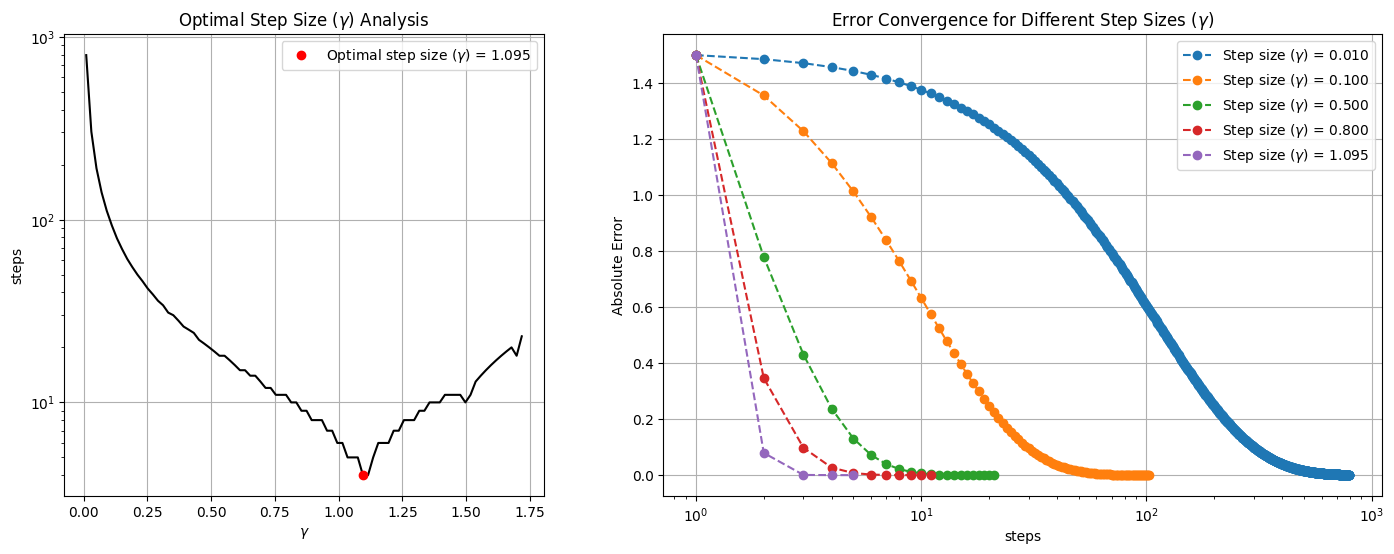

In [9]:
fig, ax = plt.subplots(1,2, figsize=(17,6), gridspec_kw={'width_ratios': [1, 1.5]})

# optimal step size
ax[0].plot(gammas, gammas_steps, "k")
ax[0].plot(gammas[i], gammas_steps[i], "ro", label=rf"Optimal step size ($\gamma$) = {gamma_optimal:.3f}")
ax[0].set(yscale="log", xlabel=r"$\gamma$", ylabel="steps", title=r"Optimal Step Size ($\gamma$) Analysis")
ax[0].grid(True)
ax[0].legend()

# error convergence for different step sizes
for gamma, steps, error in errors:
    ax[1].plot(range(1, steps+2), error, "--o", label=f"Step size ($\gamma$) = {gamma:.3f}")
ax[1].set(xscale='log', xlabel="steps", ylabel="Absolute Error", title=r"Error Convergence for Different Step Sizes ($\gamma$)")
ax[1].grid(True)
ax[1].legend()

plt.show()

One can notice that at optimal choice of $\gamma = 1.095$ the error converge the fastest. This go along with the fact that the gradient decent takes less steps "i.e. big jumps"  to reach the local minimum at such $\gamma$.